# COGS 18 Final Project 

Elias Solorzano


**Project should be run through this notebook, NOT a script(.py file). Excel files will be needed- they should be in the same folder to extract information

## How do MLB players from the 2015 roster compare to Hall of Fame caliber players, and are there any that could potentially be next in the Hall of Fame based on their game stats?

In [1]:
#run this code first to make sure rest of code works 

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from my_module.functions import info_ERA, info_IP, info_BperSO, info_WL, new_hof, nxt_hof, top_list_x

In [2]:
#Extract information from Excel files, retrieved from baseball-reference.com, year 2015

#complete list of MLB hall of famers
hof = pd.read_csv('hof.csv')

#list of hof pitchers and stats
hof_pitch = pd.read_csv('hof_pitching.csv')

#list of hof batters and stats
hof_batting = pd.read_csv('hof_batting.csv')

#2015 roster of standard pitching stats
pitch_2015 = pd.read_csv( '2015_pitching_players_standard_pitching.csv') 

#2015 roster of standard batting stats
bat_2015 = pd.read_csv( '2015_batting_players_standard_batting.csv') 

Baseball has always been America's favorite pasttime, but even someone's favorite sport becomes different with time. In the scope of this project we will be focusing more on the recent HOF players (born after 1950) and how they compare to players in 2015.

In [3]:
#some files have special characters, using str.replace to help filter out unnecessary characters
hof['birthyear'] = hof['birthyear'].str.replace('-.*','')

# makes sure all values in the column are int
hof['birthyear'] = (hof['birthyear']).astype(int) 

#rearrange dataframe that has entries correlating to a birthyear >= 1950
hof = hof.loc[hof['birthyear'] >= 1950]

#rearrange hof batting roster to be players inducted before 2015 to be consistent with the player roster
hof_batting= hof_batting.loc[hof_batting['Inducted'] < 2015]

In [4]:
# more filtering of unnecessary characters that will help in calling out values in future code
hof_pitch['Name'] = hof_pitch['Name'].str.replace(' HOF', '')
hof_batting['Name'] = hof_batting['Name'].str.replace(' HOF', '')
pitch_2015['Name'] = pitch_2015['Name'].str.replace('*','')
pitch_2015['Name'] = pitch_2015['Name'].str.replace('#','')
bat_2015['Name'] = bat_2015['Name'].str.replace('*','')
bat_2015['Name'] = bat_2015['Name'].str.replace('#','')

An important distinction between baseball players is if one is a pitcher or not a pitcher(positional player). Separating the two helps in comparing to certain HOF players as both can't be compared to each other or at least wouldn't really be telling us much if we did.

In [5]:
#use function new_hof() to get new column in hof list will correlate each name to whether they are a pitcher or positional player
hof['Position'] = new_hof(hof['Name'],hof_pitch['Name']).replace((True, False), ('pitcher','positional player')) 


In [6]:
#pitchers from overall hof list  
hof_pitcher_fin = hof.loc[hof['Position'] == 'pitcher']

#positional players from overall hof list
hof_posplayer_fin = hof.loc[hof['Position'] == 'positional player']


In [7]:
#Joins list of names with separator from pitchers list
pattern_pitchfin = '|'.join(hof_pitcher_fin['Name'])

#rearrange dataframe to have names that are in both hof pitchers list and in our final list of pitchers from hof list     
hof_pitcher_fin = hof_pitch.loc[hof_pitch['Name'].str.contains(pattern_pitchfin)]

#Joins list of names with separator from positional players list
pattern_posplyfin = '|'.join(hof_posplayer_fin['Name'])

#rearrange dataframe to have names that are in both hof batting list and in our final list of positional players from hof list      
hof_posplayer_fin = hof_batting.loc[hof_batting['Name'].str.contains(pattern_posplyfin)]


In order to obtain a more optimized list of pitchers from 2015, we will adjust the list to only those that have certain strikeouts, games played, and Earned Run Average.

In [8]:
#removes duplicate header rows in dataframe
pitch_2015= pitch_2015[~pitch_2015['Name'].str.contains("Name")]

#all column values should be int or floats
pitch_2015['ERA'] = (pitch_2015['ERA']).astype(float)
pitch_2015['SO'] = (pitch_2015['SO']).astype(int)
pitch_2015['G'] = (pitch_2015['G']).astype(int)
pitch_2015['GS'] = (pitch_2015['GS']).astype(int)

#new dataframe that contains pitchers that have a strikeout better than 80, played at least 25 games, and and ERA of less than 3.00
best_pitch_2015 = pitch_2015.loc[(pitch_2015['SO'] >= 80) & (pitch_2015['G'] >= 25) & (pitch_2015['ERA'] < 3.00)]


For batters or positional players we will also adjust the list to only look at who has the best AB, with certain amount of games played.

In [9]:
#removes duplicate header rows in dataframe
bat_2015= bat_2015[~bat_2015['Name'].str.contains("Name")]

#all column values should be int
bat_2015['H'] = (bat_2015['H']).astype(int)
bat_2015['AB'] = (bat_2015['AB']).astype(int)
bat_2015['G'] = (bat_2015['G']).astype(int)

#new dataframe that contains positional players that have an AB better than 300 with more than 100 games played.
best_batter_2015 = bat_2015.loc[(bat_2015['AB'] >= 300) & (bat_2015['G'] >= 100)]

With a list of best positonal players and pitchers from the 2015 roster, the best overall players would be the ones that show up in multiple categories as the top producers. 

In [10]:
#sorts dataframe of positional players by games played from highest to lowest
top_list_G = best_batter_2015.sort_values(by = 'G', ascending = 0)

#want top 30 from list
top_list_G = top_list_G['Name'][1:31,]

#removes any values besides name, which is what we want 
top_list_G = [x for x in top_list_G if not isinstance(x, int)]

#sorts dataframe of positional players by AB from highest to lowest
top_list_AB = top_list_x(best_batter_2015, 'AB', 'Name')

#sorts dataframe of positional players by Homeruns from highest to lowest
top_list_HR = top_list_x(best_batter_2015, 'HR', 'Name')

#sorts dataframe of positional players by OBP from highest to lowest
top_list_OBP = top_list_x(best_batter_2015, 'OBP', 'Name')

#sorts dataframe of positional players by OPS from highest to lowest
top_list_OPS = top_list_x(best_batter_2015, 'OPS', 'Name')

#sorts dataframe of positional players by RBI from highest to lowest
top_list_RBI = top_list_x(best_batter_2015, 'RBI', 'Name')

#sorts dataframe of positional players by SLG from highest to lowest
top_list_SLG = top_list_x(best_batter_2015, 'SLG', 'Name')


In [11]:
#combine all the top 30 names from each list into one
top_list = top_list_G + top_list_AB + top_list_HR + top_list_OBP + top_list_OPS + top_list_RBI +top_list_SLG


The frequency that a same player appearing in multiple categories would truly be an important aspect of a player that you can see in the HOF in the future.

In [12]:
#intialize lists 
frequency_5 = []
frequency_4 = []

import collections

#counts the number of times a player appears in the list
counter = collections.Counter(top_list)

#loop to find how many times a player appears 5 times and 4 times
for item in counter:
    
    if counter[item] == 5:
        
        frequency_5.append(item)
        
    elif counter[item] == 4:
        
        frequency_4.append(item)
        
#combine list of names that appear 4 and 5 times        
players = frequency_5 + frequency_4

In [13]:
#joins list of names with separator
patterns = '|'.join(players)

#rearranges dataframe to include positional players whose names appear in both lists.
best_batter_2015 = best_batter_2015.loc[best_batter_2015['Name'].str.contains(patterns)]



One way to get an even better list of pitchers is separating them between starting and relief pitchers, which relief pitchers have  GS of less than 10. I mean they aren't starters for no reason!

In [14]:
#dataframe containing starting pitchers by filtering out pitchers list by a GS of greater than 10
best_strtpitch = best_pitch_2015.loc[best_pitch_2015['GS'] > 10]

##dataframe containing relief pitchers by filtering out pitchers list by a GS of <= 10
best_relpitch = best_pitch_2015.loc[best_pitch_2015['GS'] <= 10]

Now we can begin comparing the best pitchers, in this case the starters, to the average of what HOF pitchers produce and what they produced in 2015. 

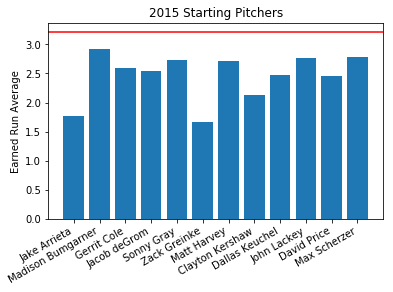

In [15]:
#create barplot comparing 2015 starting pitchers to the ERA of HOF pitchers.

objects = best_strtpitch['Name']
fig,ax = plt.subplots()
y_pos = np.arange(len(objects))

#determine values for barplot in y axis
performance = best_strtpitch['ERA']

#plots barplot
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Earned Run Average')
plt.title('2015 Starting Pitchers')
fig.autofmt_xdate()

#plot average ERA of HOF pitchers
plt.axhline(hof_pitcher_fin['ERA'].mean(), color='r', linestyle='-')

plt.show()



As you can see no starting pitcher in 2015 surpassed the average of ERA by HOF pitchers(red line). It must not be an easy feat becoming a HOF pitcher, but this is only one aspect out of many. We will compare more stats:

C:\Users\elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


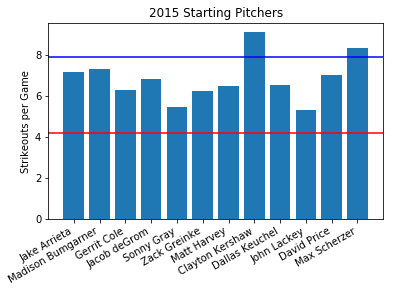

In [16]:
#in order to find the stikeouts per game divide the strikeout series by the games column
hof_pitcher_fin['SO per Game'] = hof_pitcher_fin['SO']/hof_pitcher_fin['G']
best_strtpitch['SO per Game'] = best_strtpitch['SO']/best_strtpitch['G']

objects_so = best_strtpitch['Name']
fig,ax = plt.subplots()
y_pos = np.arange(len(objects_so))
performance_so = best_strtpitch['SO per Game']

plt.bar(y_pos, performance_so, align='center')
plt.xticks(y_pos, objects_so)
plt.ylabel('Strikeouts per Game')
plt.title('2015 Starting Pitchers')
fig.autofmt_xdate()

#plot hof pitchers avg stikeout per game as well as the max
plt.axhline(hof_pitcher_fin['SO per Game'].mean(), color='r', linestyle='-')
plt.axhline(hof_pitcher_fin['SO per Game'].max(), color='b', linestyle='-')

plt.show()


As it turns out most pitchers in 2015 perform above the average of that of a HOF pitcher when it comes to strikeouts per game. Only a few have surpassed the max. 

C:\Users\elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


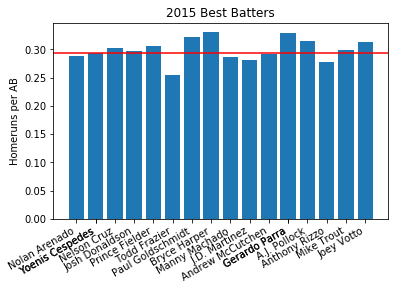

In [17]:
##in order to find H per AB divide the H series by the AB column 
hof_posplayer_fin['H per AB'] = hof_posplayer_fin['H']/hof_posplayer_fin['AB']
best_batter_2015['H per AB'] = best_batter_2015['H']/best_batter_2015['AB']


fig,ax = plt.subplots()
y_pos = best_batter_2015['Name']
performance_h = best_batter_2015['H per AB']

plt.bar(y_pos, performance_h, align='center')
plt.xticks(y_pos)
plt.ylabel('Homeruns per AB')
plt.title('2015 Best Batters')
fig.autofmt_xdate()

#plot the H per AB for a hof positional player
plt.axhline(hof_posplayer_fin['H per AB'].mean(), color='r', linestyle='-')


plt.show()


By the chart, there are many positional players in 2015 that put up numbers above the average of a HOF positional player. The ones that aren't above the average in the bar plot, are not that far behind. Now, we will look at how individual pitchers' stats across their whole career fare against HOF pitchers:

In [18]:
#use function info_ERA() to retrive career average ERA for each starting pitcher
clayton_kershaws_era = info_ERA('clayton_kershaws')
jake_arrietas_era = info_ERA('jake_arrietas')
madison_bumgarners_era = info_ERA('madison_bumgarners')
gerrit_coles_era = info_ERA('gerrit_coles')
jacob_degroms_era = info_ERA('jacob_degroms')
sonny_grays_era = info_ERA('sonny_grays')
zack_greinkes_era = info_ERA('zack_greinkes')
matt_harveys_era = info_ERA('matt_harveys')
dallas_keuchels_era = info_ERA('dallas_keuchels')
john_lackeys_era = info_ERA('john_lackeys')
david_prices_era = info_ERA('david_prices')
max_scherzers_era = info_ERA('max_scherzers')

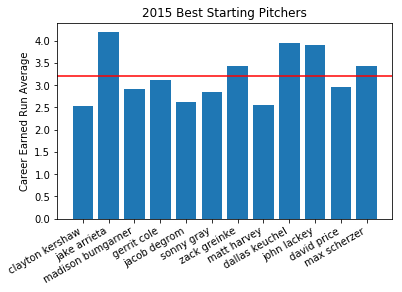

In [19]:
#plot starting pitchers' career avg ERA against the avg HOF pitchers' ERA 
fig,ax = plt.subplots()
y_pos_era = ['clayton kershaw', 
         'jake arrieta',
         'madison bumgarner',
         'gerrit cole',
        'jacob degrom',
        'sonny gray',
        'zack greinke',
        'matt harvey',
        'dallas keuchel',
        'john lackey',
        'david price',
        'max scherzer']

performance_era = [clayton_kershaws_era, 
         jake_arrietas_era,
         madison_bumgarners_era,
         gerrit_coles_era,
        jacob_degroms_era,
        sonny_grays_era ,
        zack_greinkes_era ,
        matt_harveys_era,
        dallas_keuchels_era,
        john_lackeys_era,
        david_prices_era,
        max_scherzers_era]

plt.bar(y_pos_era, performance_era, align='center')
plt.xticks(y_pos_era)
plt.ylabel('Career Earned Run Average')
plt.title('2015 Best Starting Pitchers')
fig.autofmt_xdate()

#plots avg ERA of hof pitchers
plt.axhline(hof_pitcher_fin['ERA'].mean(), color='r', linestyle='-')


plt.show()


As you can see the individual career ERA of the starting pitchers is much higher than when comparing to just their 2015 stats alone, indicated by some of the values surpassing the avg HOF ERA, when in 2015 none of them passed the red line(see above ERA plot). 

In [20]:
#use function info_BperSO to retrieve career batters faced per strikeout for each starting pitcher
clayton_kershaws = info_BperSO('clayton_kershaws')
jake_arrietas = info_BperSO('jake_arrietas')
madison_bumgarners = info_BperSO('madison_bumgarners')
gerrit_coles = info_BperSO('gerrit_coles')
jacob_degroms = info_BperSO('jacob_degroms')
sonny_grays = info_BperSO('sonny_grays')
zack_greinkes = info_BperSO('zack_greinkes')
matt_harveys = info_BperSO('matt_harveys')
dallas_keuchels = info_BperSO('dallas_keuchels')
john_lackeys = info_BperSO('john_lackeys')
david_prices = info_BperSO('david_prices')
max_scherzers = info_BperSO('max_scherzers')


C:\Users\elias\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


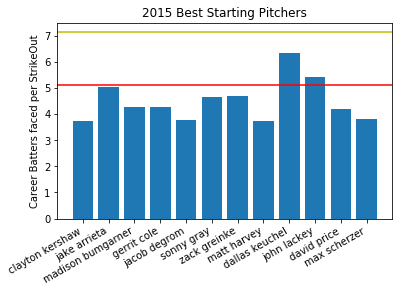

In [21]:
#to compare with hof pitchers- divide BF by Strikeouts
hof_pitcher_fin['B per SO'] = hof_pitcher_fin['BF']/hof_pitcher_fin['SO']

#plots career batters faced per strikeout of 2015 pitchers
fig,ax = plt.subplots()
y_pos_bso = ['clayton kershaw', 
         'jake arrieta',
         'madison bumgarner',
         'gerrit cole',
        'jacob degrom',
        'sonny gray',
        'zack greinke',
        'matt harvey',
        'dallas keuchel',
        'john lackey',
        'david price',
        'max scherzer']

performance_bso = [clayton_kershaws, 
         jake_arrietas,
         madison_bumgarners,
         gerrit_coles,
        jacob_degroms,
        sonny_grays ,
        zack_greinkes ,
        matt_harveys,
        dallas_keuchels,
        john_lackeys,
        david_prices,
        max_scherzers]

plt.bar(y_pos_bso, performance_bso, align='center')
plt.xticks(y_pos_bso)
plt.ylabel('Career Batters faced per StrikeOut')
plt.title('2015 Best Starting Pitchers')
fig.autofmt_xdate()

#plots avg and max of batters faced per strikeout by hof pitchers
plt.axhline(hof_pitcher_fin['B per SO'].mean(), color='r', linestyle='-')
plt.axhline(hof_pitcher_fin['B per SO'].max(), color='y', linestyle='-')

plt.show()


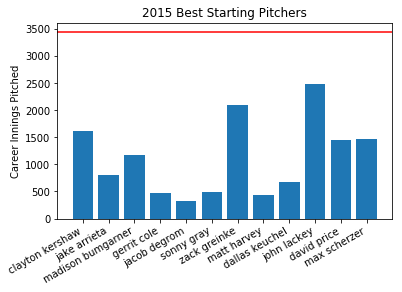

In [22]:
#use function info_IP() to retrieve career max innings pitched in a career by starting pitcher
clayton_kershaws_IP = info_IP('clayton_kershaws')
jake_arrietas_IP = info_IP('jake_arrietas')
madison_bumgarners_IP = info_IP('madison_bumgarners')
gerrit_coles_IP = info_IP('gerrit_coles')
jacob_degroms_IP = info_IP('jacob_degroms')
sonny_grays_IP = info_IP('sonny_grays')
zack_greinkes_IP = info_IP('zack_greinkes')
matt_harveys_IP = info_IP('matt_harveys')
dallas_keuchels_IP = info_IP('dallas_keuchels')
john_lackeys_IP = info_IP('john_lackeys')
david_prices_IP = info_IP('david_prices')
max_scherzers_IP = info_IP('max_scherzers')

#plots career max innings pitched by starting pitchers
fig,ax = plt.subplots()
y_pos_IP = ['clayton kershaw', 
         'jake arrieta',
         'madison bumgarner',
         'gerrit cole',
        'jacob degrom',
        'sonny gray',
        'zack greinke',
        'matt harvey',
        'dallas keuchel',
        'john lackey',
        'david price',
        'max scherzer']

performance_IP = [clayton_kershaws_IP, 
         jake_arrietas_IP,
         madison_bumgarners_IP,
         gerrit_coles_IP,
        jacob_degroms_IP,
        sonny_grays_IP ,
        zack_greinkes_IP ,
        matt_harveys_IP,
        dallas_keuchels_IP,
        john_lackeys_IP,
        david_prices_IP,
        max_scherzers_IP]

plt.bar(y_pos_IP, performance_IP, align='center')
plt.xticks(y_pos_IP)
plt.ylabel('Career Innings Pitched')
plt.title('2015 Best Starting Pitchers')
fig.autofmt_xdate()

#plots avg innings pitched by a hof pitcher
plt.axhline(hof_pitcher_fin['IP'].mean(), color='r', linestyle='-')


plt.show()


The career max innings pitched by a 2015 pitcher is not even close to the avg innings pitched by a HOF. With closer reasoning, this may be due to the fact that players still have a lot of years left in their career and will take time to reach those kind of numbers. 

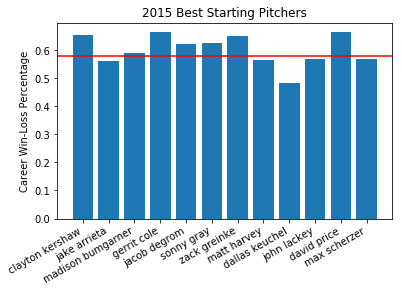

In [23]:
#use function info_WL() to retrieve career avg win loss percentage of each starting pitcher
clayton_kershaws_WL = info_WL('clayton_kershaws')
jake_arrietas_WL = info_WL('jake_arrietas')
madison_bumgarners_WL = info_WL('madison_bumgarners')
gerrit_coles_WL = info_WL('gerrit_coles')
jacob_degroms_WL = info_WL('jacob_degroms')
sonny_grays_WL = info_WL('sonny_grays')
zack_greinkes_WL = info_WL('zack_greinkes')
matt_harveys_WL = info_WL('matt_harveys')
dallas_keuchels_WL = info_WL('dallas_keuchels')
john_lackeys_WL = info_WL('john_lackeys')
david_prices_WL = info_WL('david_prices')
max_scherzers_WL = info_WL('max_scherzers')

#plots career avg win loss percentage of each pitcher
fig,ax = plt.subplots()
y_pos_WL = ['clayton kershaw', 
         'jake arrieta',
         'madison bumgarner',
         'gerrit cole',
        'jacob degrom',
        'sonny gray',
        'zack greinke',
        'matt harvey',
        'dallas keuchel',
        'john lackey',
        'david price',
        'max scherzer']

performance_WL = [clayton_kershaws_WL, 
         jake_arrietas_WL,
         madison_bumgarners_WL,
         gerrit_coles_WL,
        jacob_degroms_WL,
        sonny_grays_WL ,
        zack_greinkes_WL ,
        matt_harveys_WL,
        dallas_keuchels_WL,
        john_lackeys_WL,
        david_prices_WL,
        max_scherzers_WL]

plt.bar(y_pos_WL, performance_WL, align='center')
plt.xticks(y_pos_WL)
plt.ylabel('Career Win-Loss Percentage')
plt.title('2015 Best Starting Pitchers')
fig.autofmt_xdate()

#plots avg win loss percentage of a hof pitcher
plt.axhline(hof_pitcher_fin['W-L%'].mean(), color='r', linestyle='-')


plt.show()


In [24]:
#arranges each set of players and their corresponding statistical category into a dictionary
era_players = dict(zip(y_pos_era, performance_era))
b_perso_players = dict(zip(y_pos_bso, performance_bso))
WL_players = dict(zip(y_pos_WL, performance_WL))

Observing how each individual starting pitcher in 2015 performed relative to a HOF pitcher, we can now attempt at finding the frequency of how many times a certain individual outperformed a HOF pitcher. 

In [25]:
#use function nxt_hof() to get players and the amount of times they outperformed the avg of a certain stat category of a HOF pitcher
nxt_hof(era_players, b_perso_players, WL_players, hof_pitcher_fin['ERA'], hof_pitcher_fin['B per SO'],hof_pitcher_fin['W-L%'] )


Counter({'zack greinke': 2, 'dallas keuchel': 2, 'john lackey': 2, 'jake arrieta': 1, 'max scherzer': 1, 'clayton kershaw': 1, 'madison bumgarner': 1, 'gerrit cole': 1, 'jacob degrom': 1, 'sonny gray': 1, 'david price': 1})


To conclude, the counter shows that Zack Greinke, Dallas Keuchel, and John Lackey outperformed the avg HOF pitcher in the most categories compared to their other 2015 counterparts. This model is not 100% fullproof because there are also many other statistical categories to consider such as bases on balls per game. Also, some players have played less time compared to the others, but this gives us an idea of who is well on their way to becoming a Hall of Famer, amongst the best pitchers!